<a href="https://colab.research.google.com/github/OswaldVc/AnaDat/blob/main/An%C3%A1lisis_de_demanda_el%C3%A9ctrica_mensual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from flask import *
import numpy as np # linear algebra
from sklearn.decomposition import PCA
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt

# ------- Importación de Módulos ------------

from locale import normalize
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import missingno as msno
## Data cleaning y data wrangling
import pandas            as pd
import numpy             as np
## Visualización
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px
import warnings

sns.set_style("darkgrid") ## Estilo para los gráficos
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

np.random.seed(0)

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [ ]:
# ------------ Cargamos el archivo désde reporsitorio Github ----------------

url_base ="https://raw.githubusercontent.com/OswaldVc/BDD/main/"
name_data = "predictive_maintenance.csv"
Datos = pd.read_csv(url_base + name_data, )
Datos.head(40) #------------------------------------------------------ >>>> Lectura del conjunto de datos

In [ ]:
Datos.shape

(10000, 10)

In [ ]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
Datos.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [ ]:
Datos.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
Datos.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
from collections import OrderedDict
import seaborn as sns

colors = ["#845EC2", "#D65DB1", "#FF6F91", "#FF9671",
             "#FFC75F", "#008F7A", "#F9F871"]
# background_color = "#FFF6FF"
background_color = "white"

In [ ]:
def show_category_distribution(data_frame,
                            label_name,
                            colors,
                            exclude=[],
                            figsize=(10, 5),
                            d=[1, 2],
                            bg_color=background_color):

    label_dict = data_frame[label_name].value_counts().to_dict()
    for e in exclude:
        del label_dict[e]
    label_dict = OrderedDict(sorted(label_dict.items(), key=lambda label: label[1]))
    label_classes= label_dict.keys()
    label_values = label_dict.values()
    explode = (0,)*(data_frame[label_name].nunique() - len(exclude))

    fig, ax = plt.subplots(d[0], d[1], facecolor=bg_color, figsize=figsize)
    sns.countplot(data=data_frame,
                  x=label_name,
                  palette=colors,
                  edgecolor="black",
                  hatch="\\",
                  ax=ax[0],
                  linewidth=1,
                  order = data_frame[label_name].value_counts().index)
    ax[0].set_title(f"Distribution of \"{label_name}\"", size=14, fontweight="bold")
    ax[0].set_xlabel("Class", size=10, fontweight="bold")
    ax[0].set_ylabel("Frequency", size=10, fontweight="bold")
    ax[0].tick_params(axis="x", labelsize=9)
    ax[0].tick_params(axis="y", labelsize=9)
    ax[0].bar_label(ax[0].containers[0], fmt="%.0f", color="black", fontsize=9)

    plt.pie(label_values,
            explode=explode,
            labels=label_classes,
            autopct="%1.2f%%",
            shadow=True,
            startangle=90,
            textprops={"fontsize": 8, "fontweight": "bold", "color": "black"},
            wedgeprops={"edgecolor": "black"},
            colors=colors,
            labeldistance=1.1)
    plt.title(f"Distribution \n of \"{label_name}\". {','.join(exclude)} {'Excluded' if len(exclude)>0 else ''}",
              fontweight="bold",
              fontsize=14)

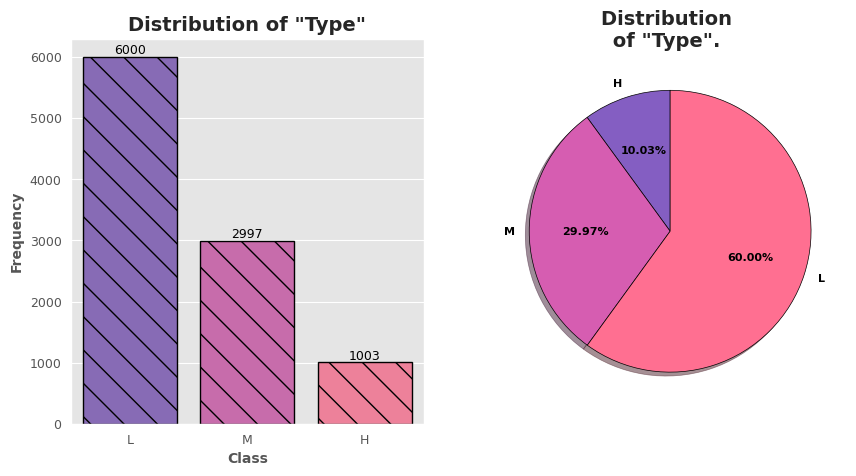

In [ ]:
show_category_distribution(Datos,
                        "Type",
                        colors,
                        bg_color=background_color)

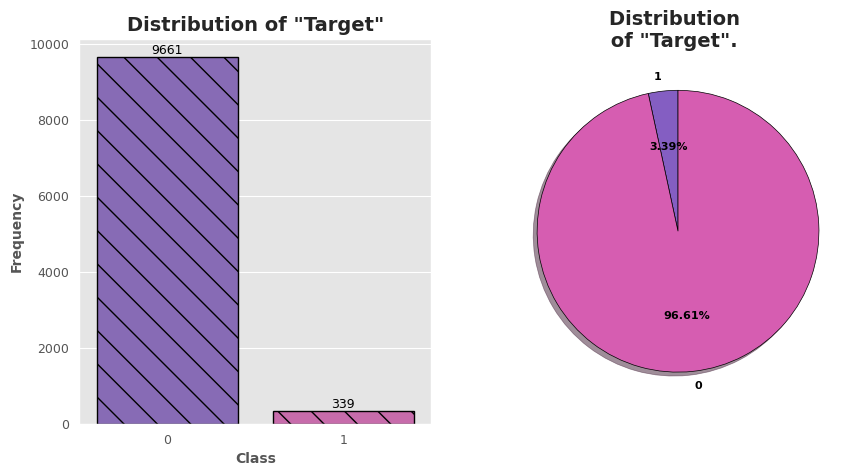

In [ ]:
show_category_distribution(Datos,
                        "Target",
                        colors,
                        bg_color=background_color)

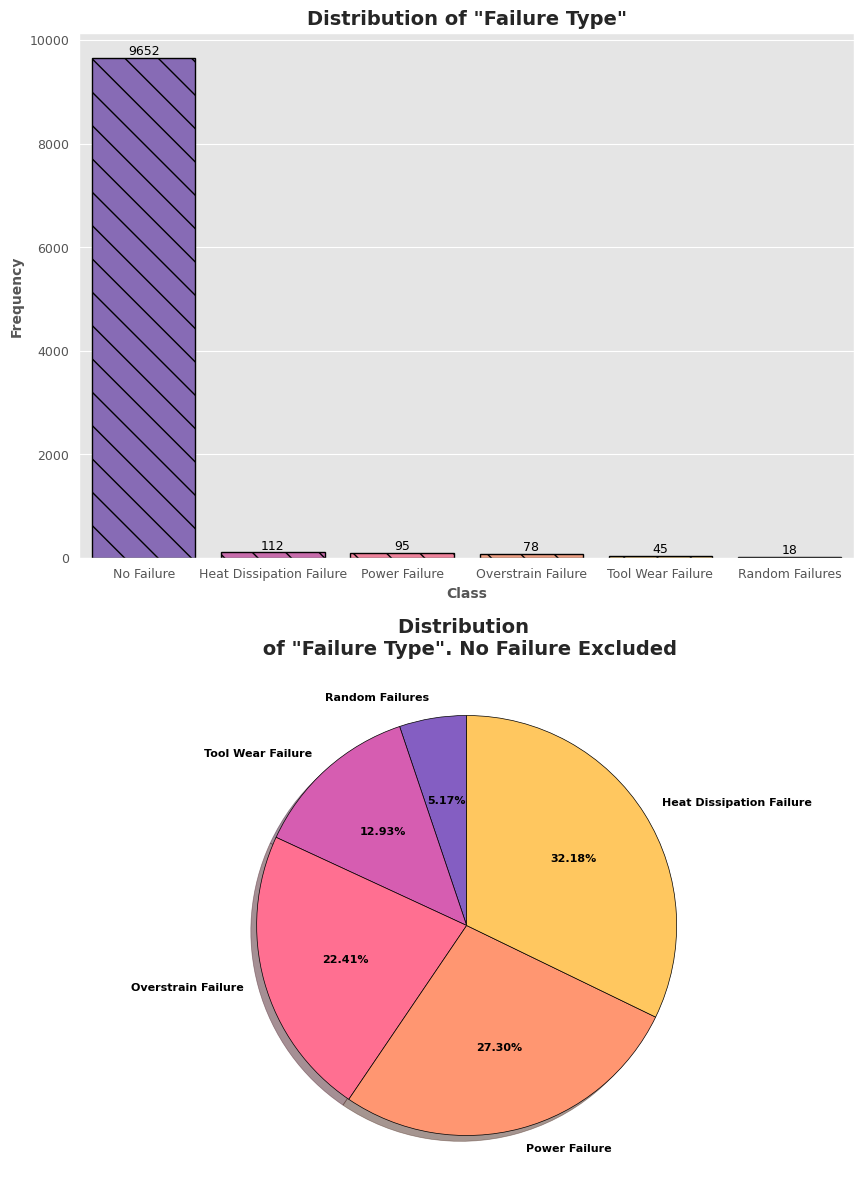

In [ ]:
show_category_distribution(Datos,
                        "Failure Type",
                        colors,
                        exclude=["No Failure"],
                        figsize=(10, 15),
                        d=[2, 1],
                        bg_color=background_color)

In [ ]:
def show_numerical_distributions(data_frame, features, label, colors, kind="kde",  fill=True, combined=True):
    if combined:
        for feature in features:
            with sns.axes_style("white",
                           rc={"axes.facecolor": background_color, "figure.facecolor": background_color}):
                sns.displot(data=data_frame,
                            x=feature,
                            hue=label,
                            kind=kind,
                            palette=colors,
                            fill=fill,
                            legend=True,
                            aspect=2.5)
                plt.title("Distribution of " + feature.capitalize() + " by " + label.capitalize(),
                          size=14,
                          fontweight="bold",
                          color="black")
    else:
        for feature in features :
            with sns.axes_style("white",
                                rc={"axes.facecolor": (0, 0, 0, 0), 'figure.facecolor': background_color}):

                g = sns.FacetGrid(Datos,
                                  row=label,
                                  hue=label,
                                  aspect=20,
                                  height=.5,
                                  palette=colors)

                g.map(sns.kdeplot,
                      feature,
                      bw_adjust=.5,
                      clip_on=False,
                      fill=True,
                      alpha=1,
                      linewidth=1.5)

                g.map(sns.kdeplot,
                      feature,
                      clip_on=False,
                      color="w",
                      lw=2,
                      bw_adjust=.5)

                g.map(plt.axhline,
                      y=0,
                      linewidth=2,
                      linestyle="-",
                      color=None,
                      clip_on=False)

                def plot_label(x, color, label):
                    ax = plt.gca()
                    ax.text(0,
                            .2,
                            label,
                            fontweight="bold",
                            color=color,
                            ha="left",
                            va="center",
                            transform=ax.transAxes)

                g.map(plot_label, label)
                g.fig.subplots_adjust(hspace=-.25)
                g.set_titles("")
                g.set(yticks=[], xlabel="", ylabel="")
                plt.xlabel(feature, fontweight="bold")
                g.despine(bottom=True, left=True)
                plt.title("Distribution of " + feature.capitalize() + " by " + label.capitalize(),
                          size=12,
                          fontweight="bold",
                          color="black",
                          y=6)

In [ ]:
numerical_features = ["Air temperature [K]",
                      "Process temperature [K]",
                      "Rotational speed [rpm]",
                      "Torque [Nm]",
                      "Tool wear [min]"]

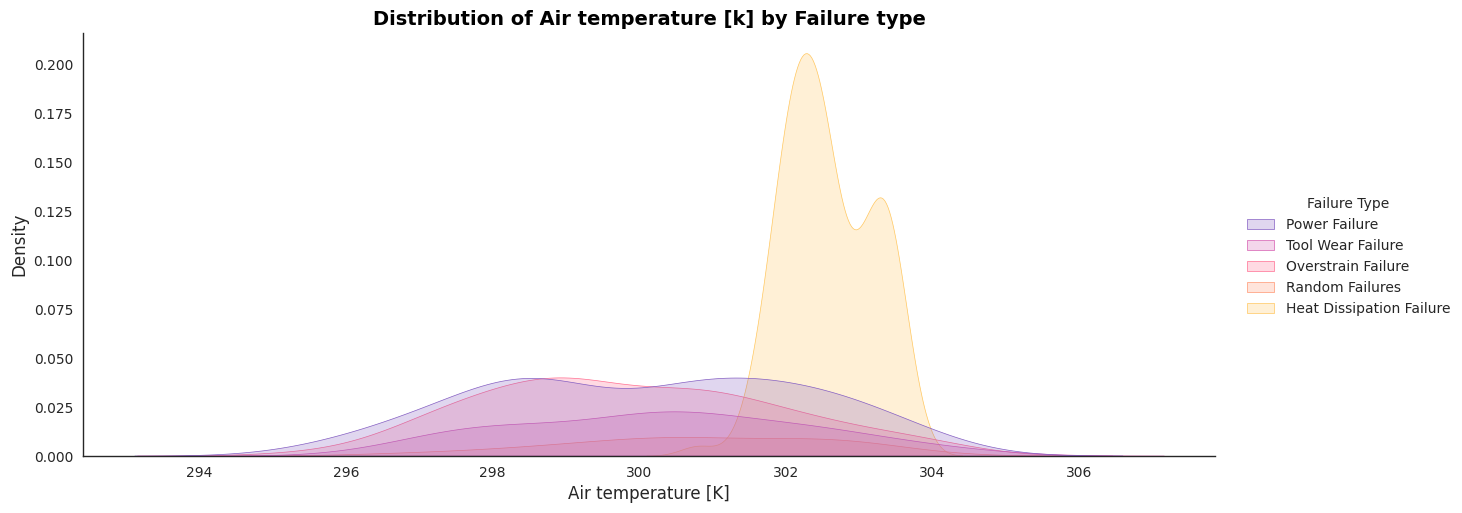

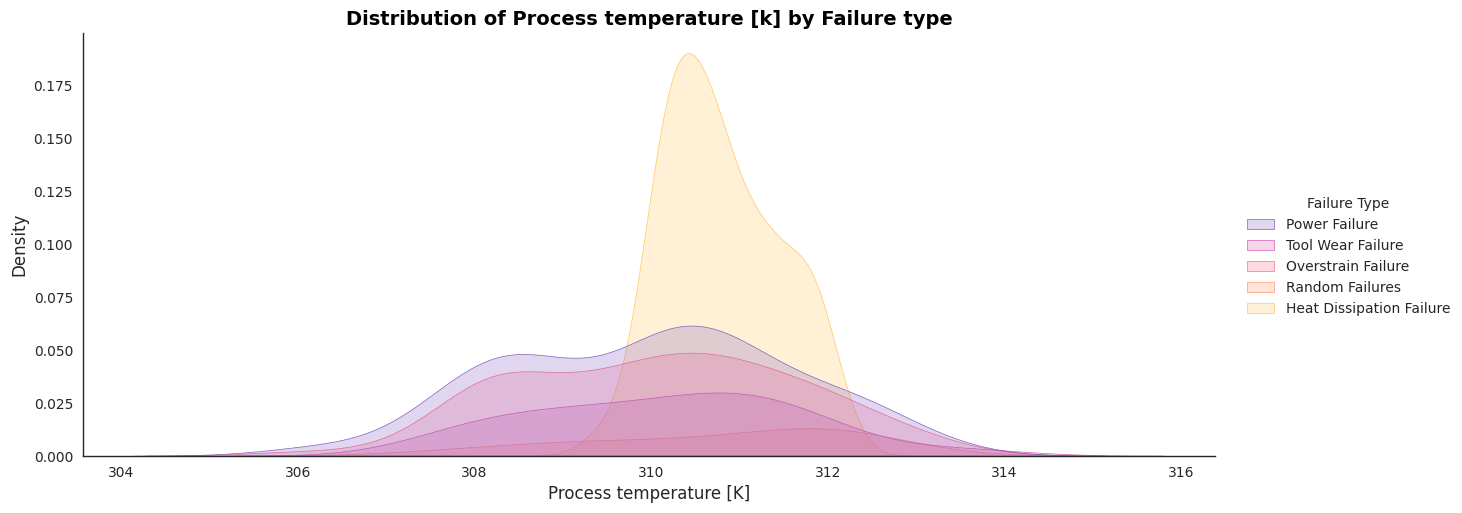

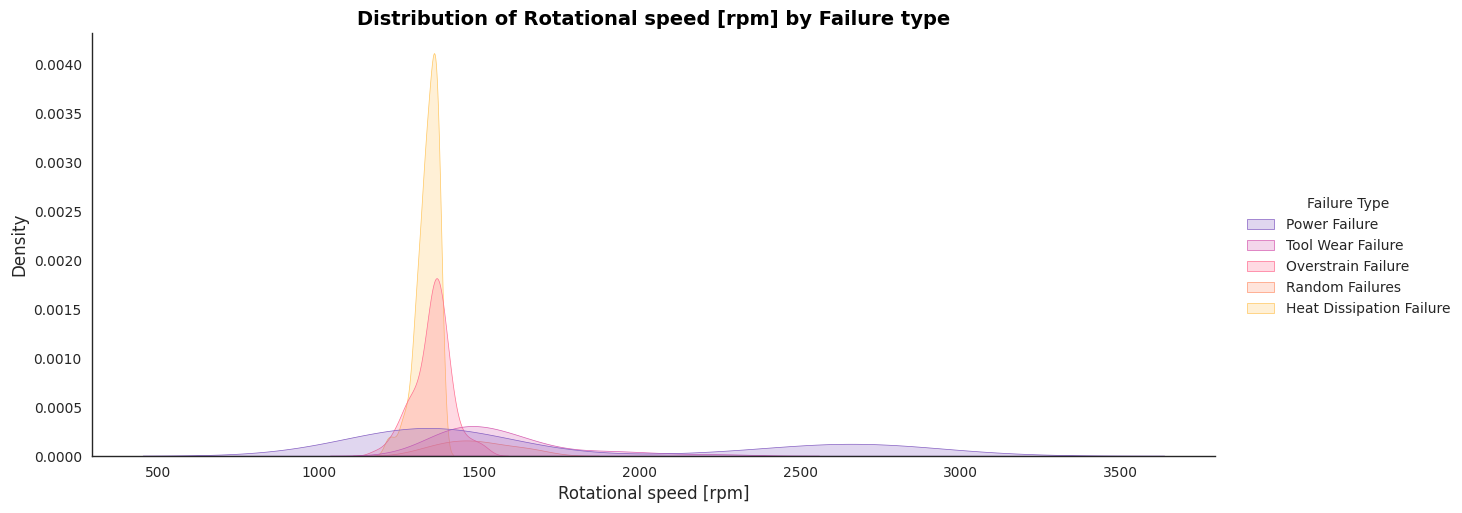

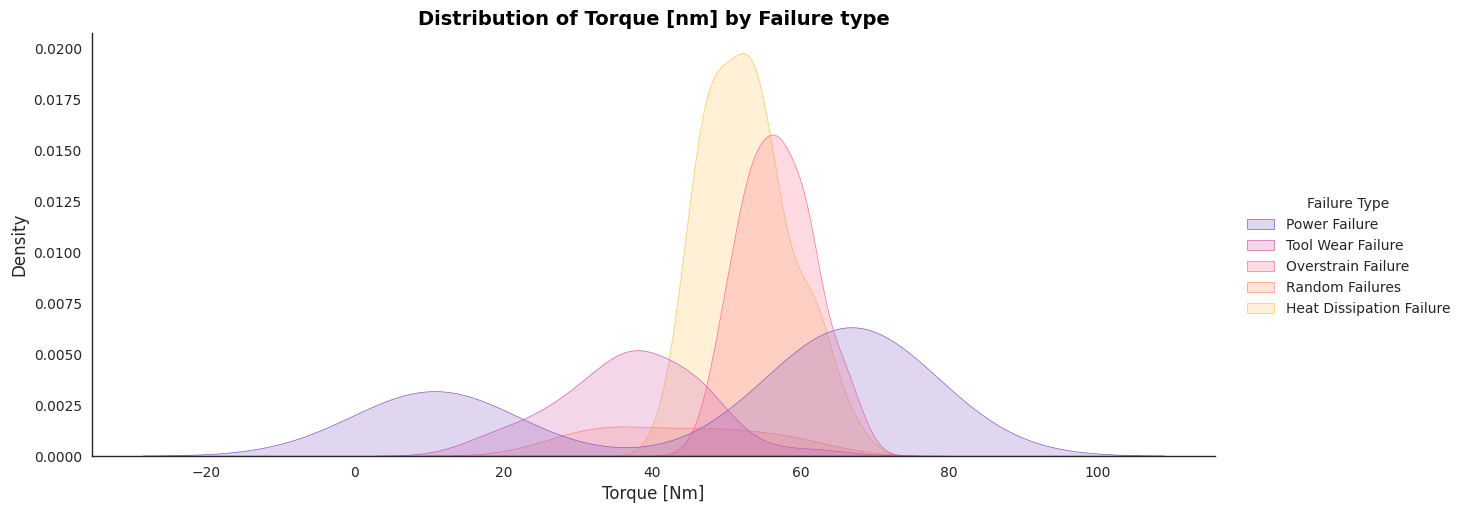

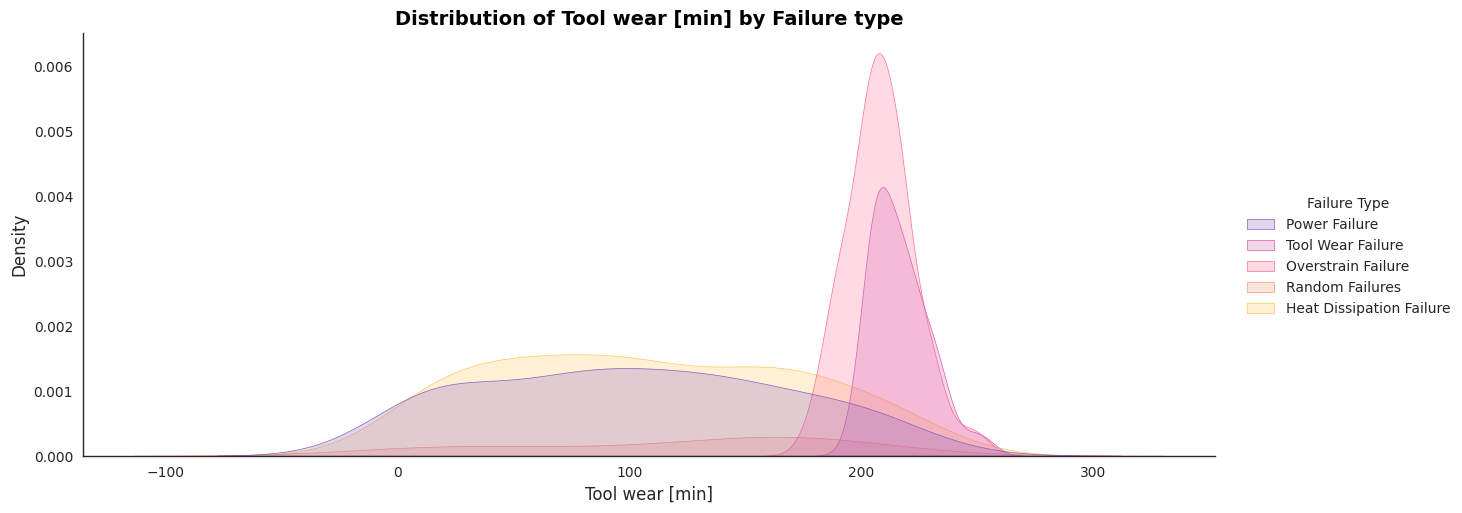

In [ ]:
show_numerical_distributions(Datos[Datos["Failure Type"] != "No Failure"],
                             numerical_features,
                             "Failure Type",
                             colors[:5])

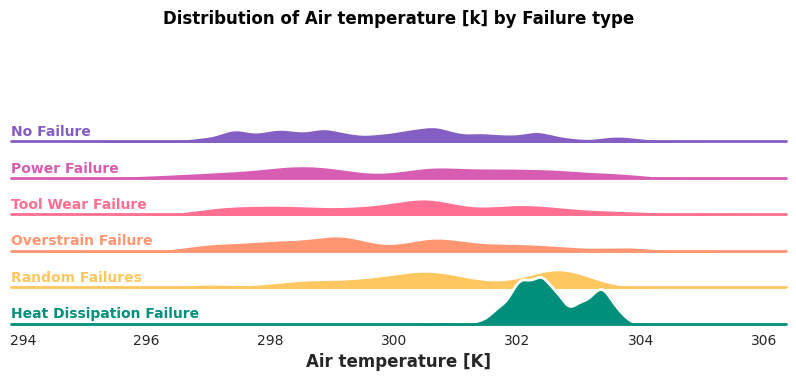

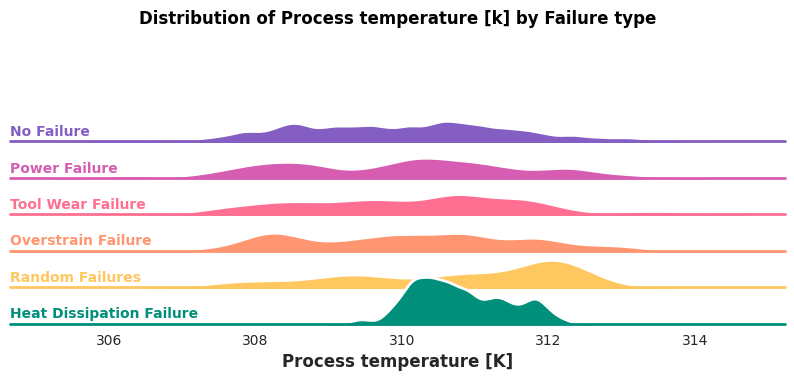

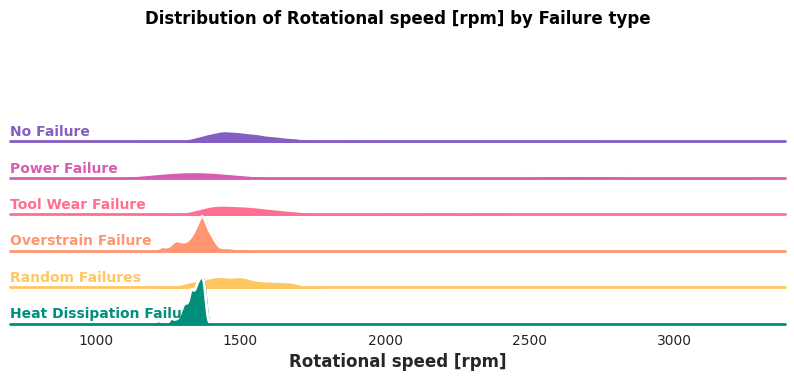

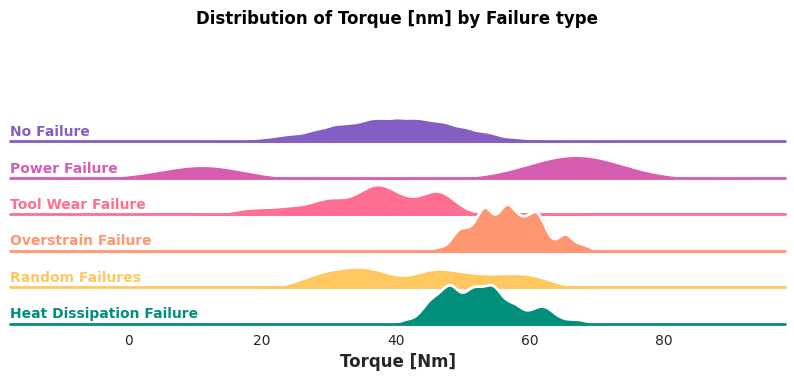

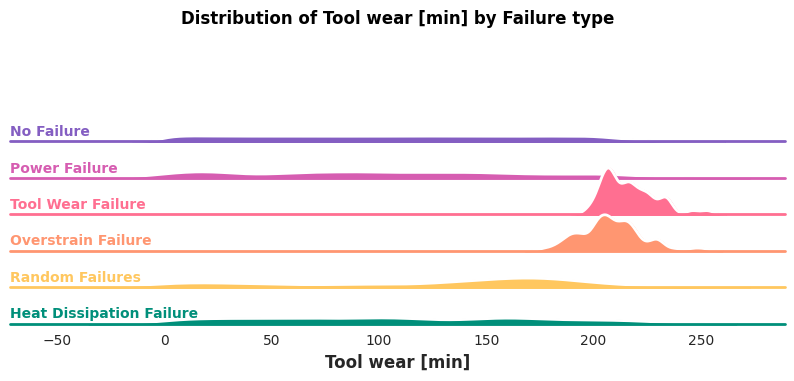

In [ ]:
show_numerical_distributions(Datos,
                             numerical_features,
                             "Failure Type",
                             colors[:6],
                             combined=False)

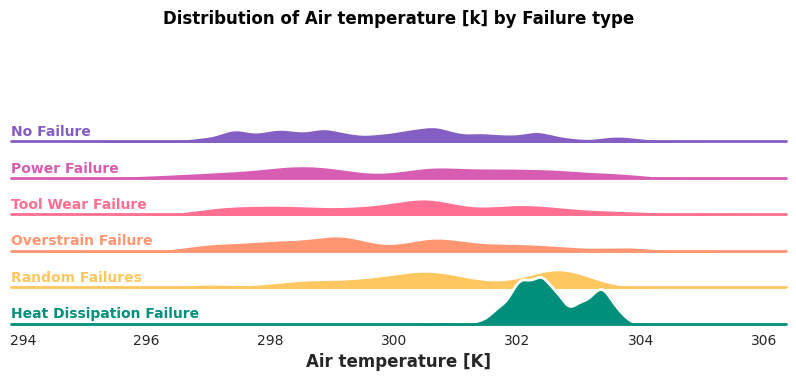

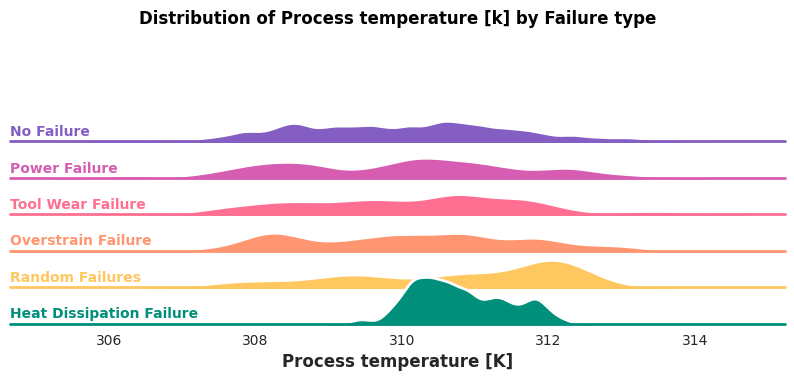

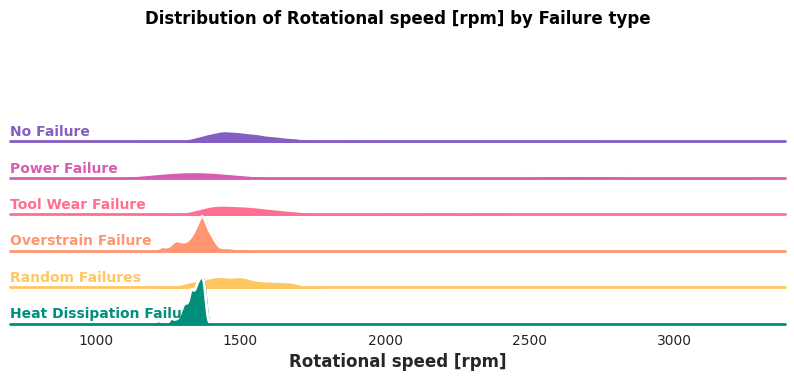

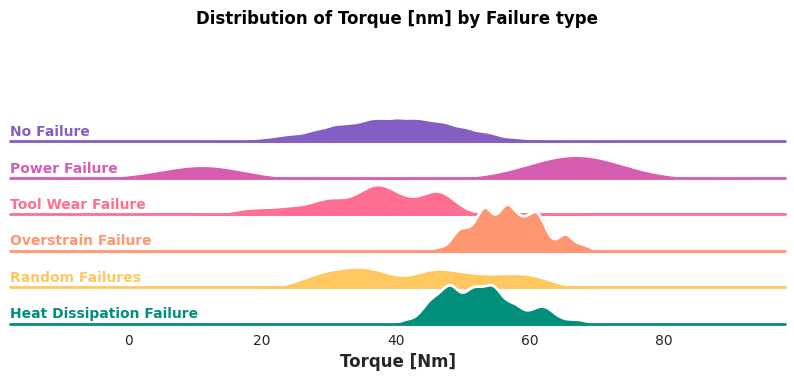

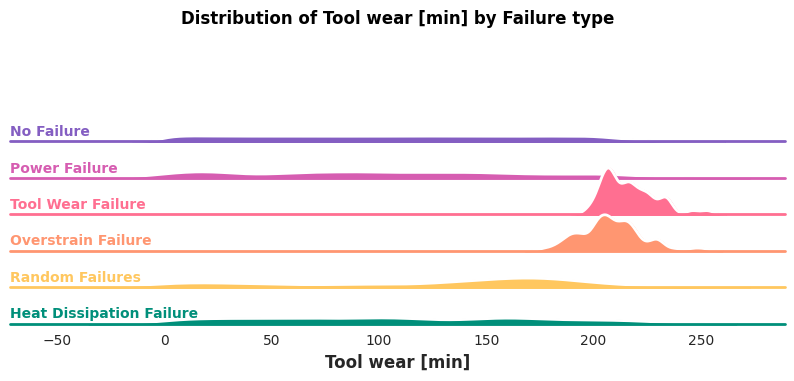

In [ ]:
show_numerical_distributions(Datos,
                             numerical_features,
                             "Failure Type",
                             colors[:6],
                             combined=False)

In [ ]:
def plot_scatter(data, x, y, hue, ax, alpha=0.1, palette=colors[::-1]):
    sns.scatterplot(data=data,
                x=x,
                y=y,
                hue=hue,
                alpha=alpha,
                ax=ax,
                palette=palette);

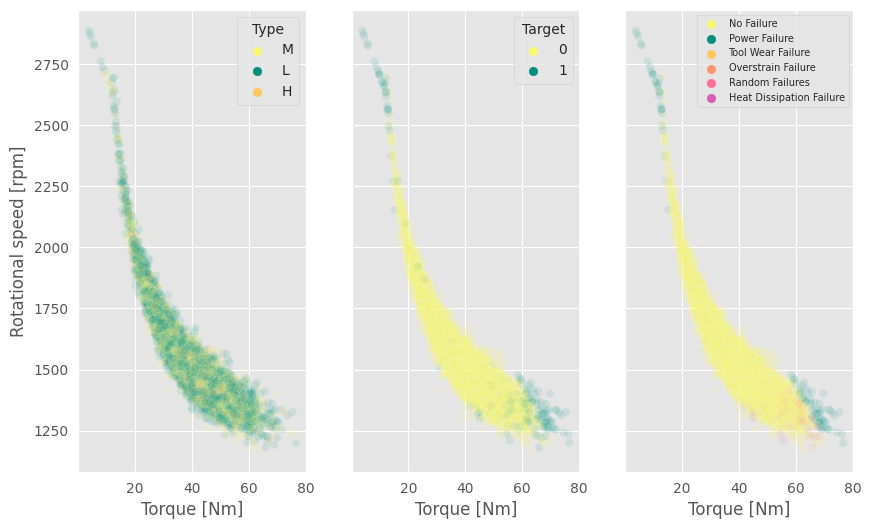

In [ ]:
fig, axes = plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(10, 6),
                         sharey=True,
                         facecolor=background_color)

plot_scatter(Datos,
             "Torque [Nm]",
             "Rotational speed [rpm]",
             "Type",
             axes[0])

plot_scatter(Datos,
             "Torque [Nm]",
             "Rotational speed [rpm]",
             "Target",
             axes[1])

plot_scatter(Datos,
             "Torque [Nm]",
             "Rotational speed [rpm]",
             "Failure Type",
             axes[2])

plt.legend(fontsize="7");

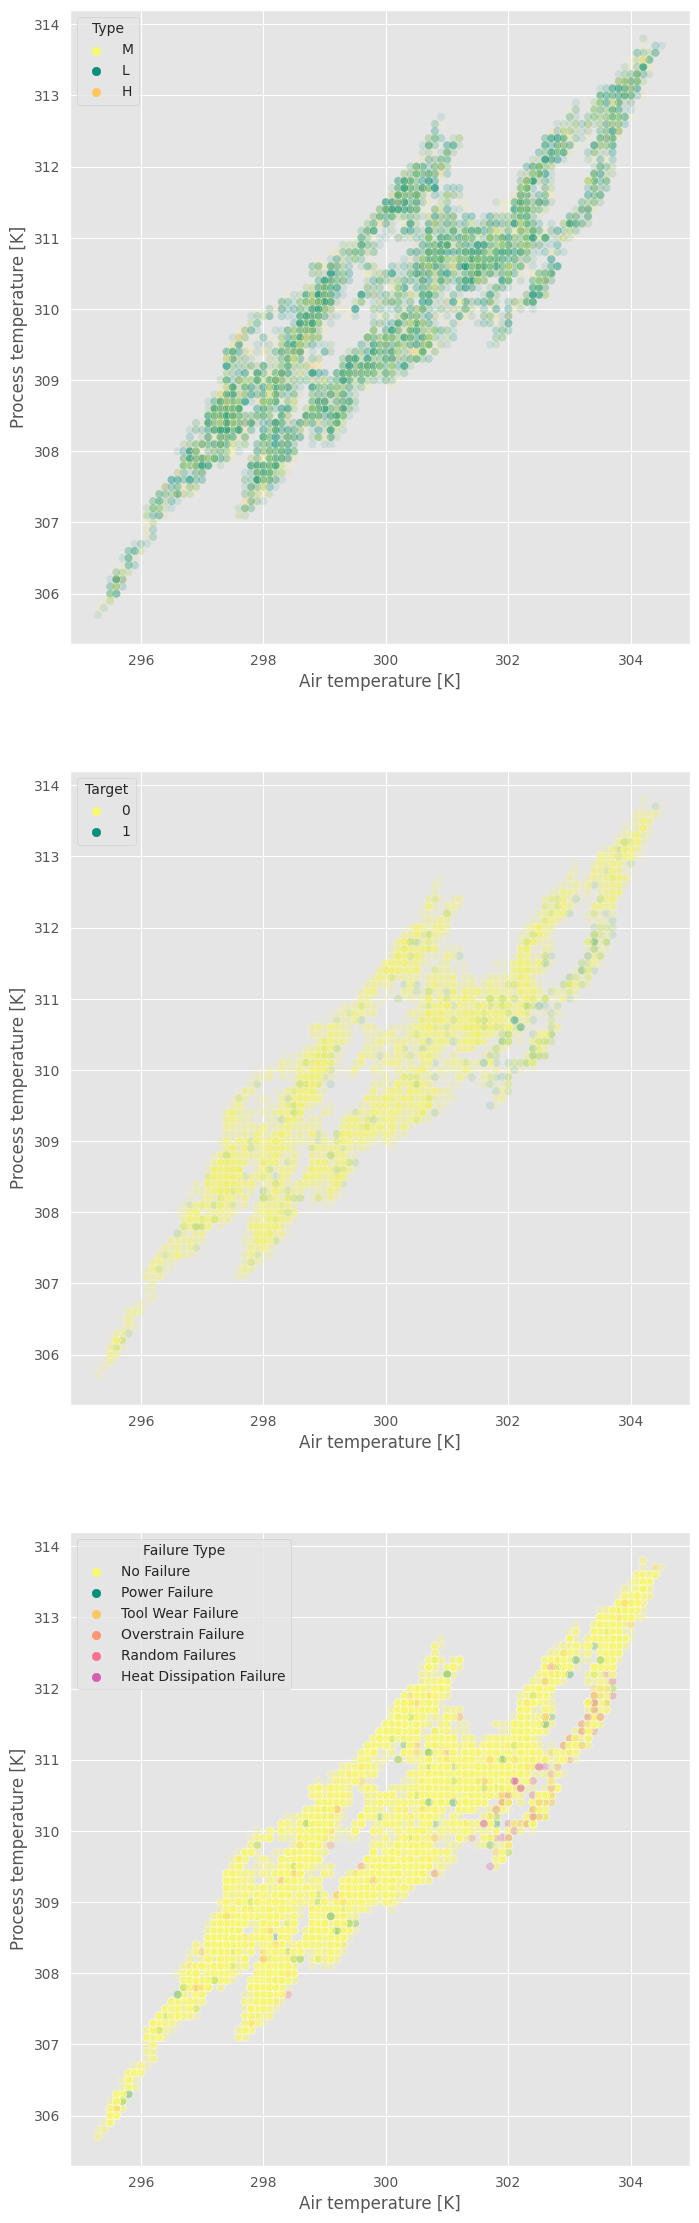

In [ ]:
fig, axes = plt.subplots(nrows=3,
                         ncols=1,
                         figsize=(8, 28),
                         facecolor=background_color)

plot_scatter(Datos,
             "Air temperature [K]",
             "Process temperature [K]",
             "Type",
             axes[0])

plot_scatter(Datos,
             "Air temperature [K]",
             "Process temperature [K]",
             "Target",
             axes[1])

plot_scatter(Datos,
             "Air temperature [K]",
             "Process temperature [K]",
             "Failure Type",
             axes[2],
             alpha=0.3)

In [ ]:
def show_outliers(data_frame, exclude=[]):
    columns_list = list(data_frame.columns)

    if len(exclude) > 0:
        for e in exclude:
            columns_list.remove(e)

    fig = plt.figure(figsize=(10,30), facecolor=background_color)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for index, column in enumerate(columns_list):
        ax = fig.add_subplot(12, 3, index +1)
        ax = sns.boxplot(x=df[column],
                         notch=True,
                         flierprops={"marker": "x"},
                         boxprops={"facecolor": (.4, .6, .8, .5)},
                         medianprops={"color": "#C34A36"})

In [ ]:
Datos.columns


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
df=Datos

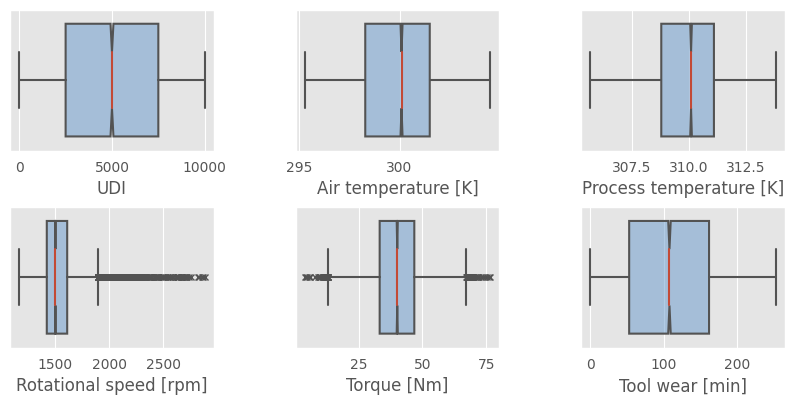

In [ ]:
show_outliers(Datos,exclude=["Failure Type", "Type", "Target", "Product ID"])

In [ ]:
def show_correlation(data_frame):
    plt.figure(figsize=(10,10), facecolor=background_color)
    corr = data_frame.corr(numeric_only=False)
    sns.heatmap(corr, annot=True, cmap=colors[0:5][::-1])
    plt.title("Correlations", size=22, fontweight="bold")
    plt.tight_layout()

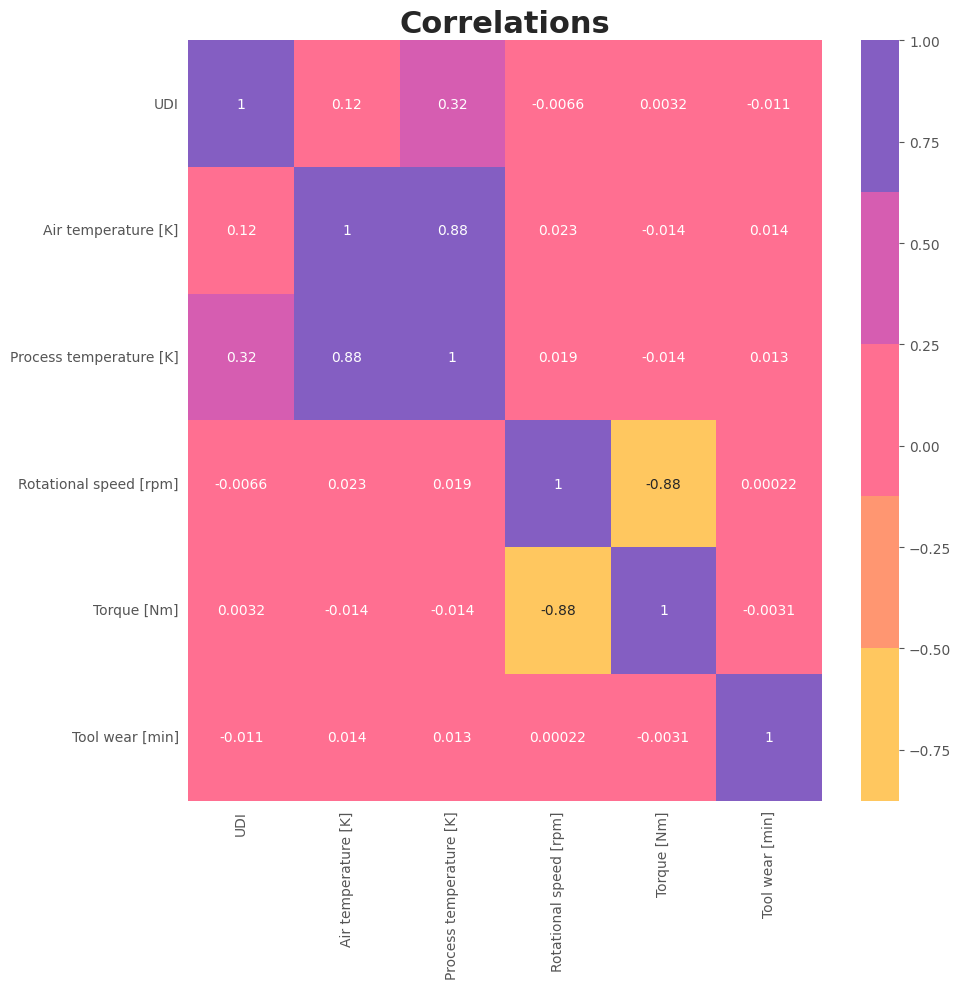

In [ ]:
show_correlation(df.drop(["Product ID", "Type", "Target", "Failure Type"], axis=1))

In [ ]:
from sklearn.model_selection import train_test_split

df_temp = df.copy()

df_temp = df_temp.drop(["UDI", "Product ID"], axis=1)
X = df_temp.drop("Failure Type", axis=1)
y = df_temp["Failure Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

one_hot_encoder = OneHotEncoder()
transformer = ColumnTransformer([("one_hot_encoder", one_hot_encoder, ["Type", "Target"])],
                                remainder="passthrough")
transformer.fit(X_train)
encoded_X_train = transformer.transform(X_train)
encoded_X_test = transformer.transform(X_test)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
random_state = 7
verbose = 0

In [ ]:
def classification_report_heatmap(cr, model_name=""):
    plt.figure(figsize=(12, 5), facecolor=background_color)
    plt.title(f"{model_name} Classification Report Heat Map")
    sns.heatmap(pd.DataFrame(cr).iloc[:-1].T, annot=True, cmap=colors);

In [ ]:
def confusion_matrix_display(estimator,
                             predicted_y,
                             true_y=encoded_y_test,
                             X=encoded_X_test,
                             y=encoded_y_test,
                             model_name=""):

    fig, ax = plt.subplots(figsize=(6, 6), facecolor=background_color)
    cm = confusion_matrix(predicted_y, true_y)
    cmd = ConfusionMatrixDisplay(cm)
    cmd.from_estimator(estimator, X, y, ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=random_state, verbose=verbose)
rfc.fit(encoded_X_train, encoded_y_train);

In [ ]:
rfc.score(encoded_X_train, encoded_y_train)

1.0

In [ ]:
rfc.score(encoded_X_test, encoded_y_test)

0.9953333333333333

In [ ]:
rfc_predicted_y = rfc.predict(encoded_X_test)

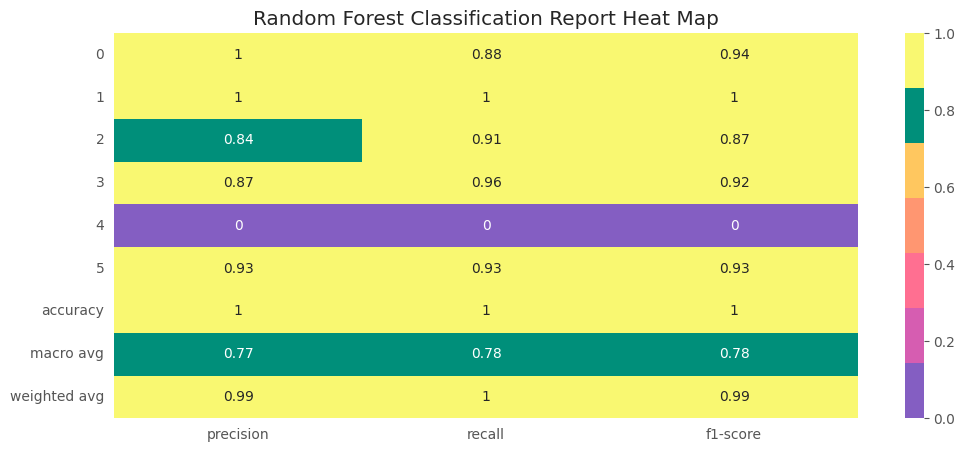

In [ ]:
rfc_cr = classification_report(encoded_y_test, rfc_predicted_y, output_dict=True)
classification_report_heatmap(rfc_cr, model_name="Random Forest")

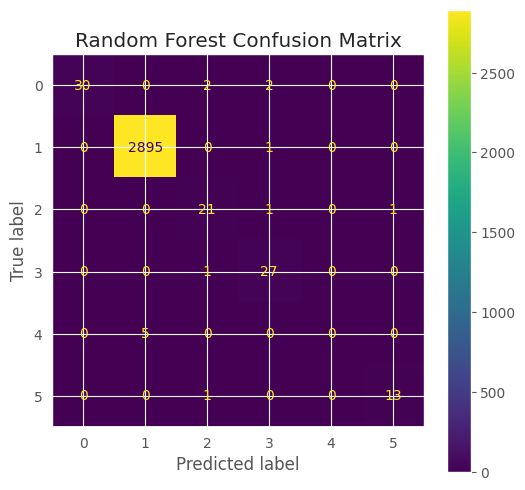

In [ ]:
confusion_matrix_display(rfc, rfc_predicted_y, model_name="Random Forest")

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=random_state)
lr.fit(encoded_X_train, encoded_y_train);

In [ ]:
lr.score(encoded_X_train, encoded_y_train)

0.9667142857142857

In [ ]:
lr.score(encoded_X_test, encoded_y_test)

0.966

In [ ]:
lr_predicted_y = lr.predict(encoded_X_test)

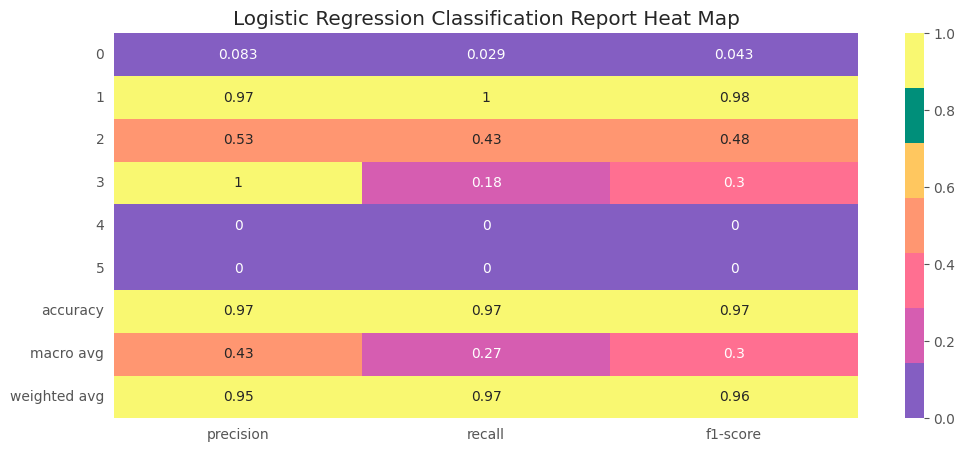

In [ ]:
lr_cr = classification_report(encoded_y_test, lr_predicted_y, output_dict=True)
classification_report_heatmap(lr_cr, model_name="Logistic Regression")

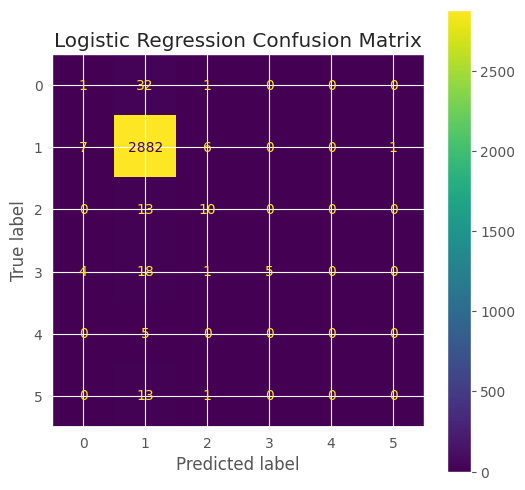

In [ ]:
confusion_matrix_display(lr, lr_predicted_y, model_name="Logistic Regression")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=random_state)
dtc.fit(encoded_X_train, encoded_y_train);

In [ ]:
dtc.score(encoded_X_train, encoded_y_train)

1.0

In [ ]:
dtc.score(encoded_X_test, encoded_y_test)

0.9896666666666667

In [ ]:
dtc_predicted_y = dtc.predict(encoded_X_test)

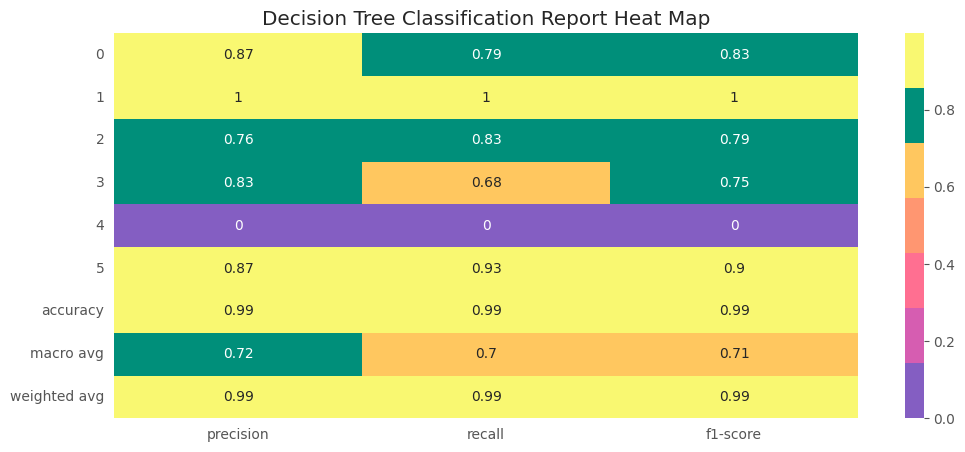

In [ ]:
dtc_cr = classification_report(encoded_y_test, dtc_predicted_y, output_dict=True)
classification_report_heatmap(dtc_cr, model_name="Decision Tree")

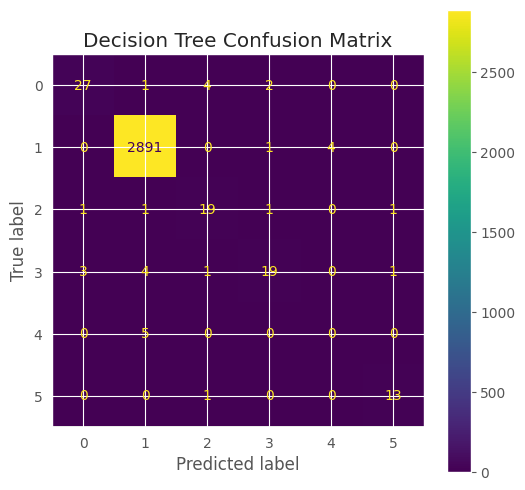

In [ ]:
confusion_matrix_display(dtc, dtc_predicted_y, model_name="Decision Tree")

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=random_state)
svc.fit(encoded_X_train, encoded_y_train);

In [ ]:
svc.score(encoded_X_train, encoded_y_train)

0.9667142857142857

In [ ]:
svc.score(encoded_X_test, encoded_y_test)

0.9666666666666667

In [ ]:
svc_predicted_y = svc.predict(encoded_X_test)

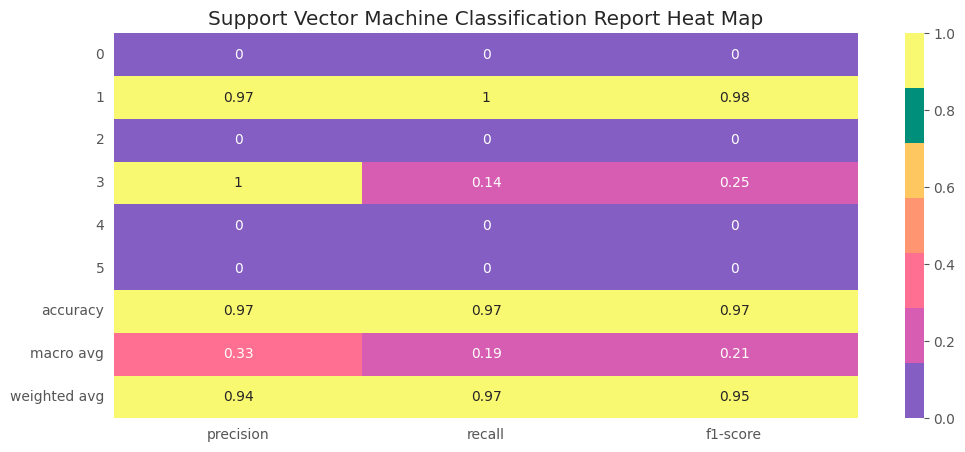

In [ ]:
svc_cr = classification_report(encoded_y_test, svc_predicted_y, output_dict=True)
classification_report_heatmap(svc_cr, model_name="Support Vector Machine")

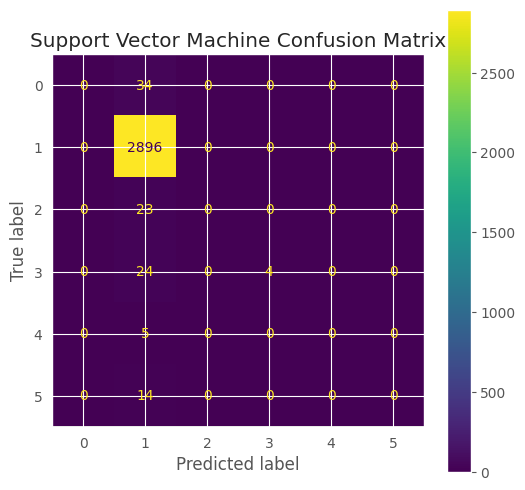

In [ ]:
confusion_matrix_display(svc, svc_predicted_y, model_name="Support Vector Machine")

In [ ]:
def failure_type_scores_df(scoring_method):

    ftsdf = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression", "Decision Tree", "Support Vector Machine"],
    "Heat Dissipation Failure": [pd.DataFrame(rfc_cr)["0"][scoring_method],
                                 pd.DataFrame(lr_cr)["0"][scoring_method],
                                 pd.DataFrame(dtc_cr)["0"][scoring_method],
                                 pd.DataFrame(svc_cr)["0"][scoring_method]],
    "No Failure": [pd.DataFrame(rfc_cr)["1"][scoring_method],
                   pd.DataFrame(lr_cr)["1"][scoring_method],
                   pd.DataFrame(dtc_cr)["1"][scoring_method],
                   pd.DataFrame(svc_cr)["1"][scoring_method]],
    "Overstrain Failure": [pd.DataFrame(rfc_cr)["2"][scoring_method],
                           pd.DataFrame(lr_cr)["2"][scoring_method],
                           pd.DataFrame(dtc_cr)["2"][scoring_method],
                           pd.DataFrame(svc_cr)["2"][scoring_method]],
    "Power Failure": [pd.DataFrame(rfc_cr)["3"][scoring_method],
                      pd.DataFrame(lr_cr)["3"][scoring_method],
                      pd.DataFrame(dtc_cr)["3"][scoring_method],
                      pd.DataFrame(svc_cr)["3"][scoring_method]],
    "Random Failures": [pd.DataFrame(rfc_cr)["4"][scoring_method],
                        pd.DataFrame(lr_cr)["4"][scoring_method],
                        pd.DataFrame(dtc_cr)["4"][scoring_method],
                        pd.DataFrame(svc_cr)["4"][scoring_method]],
    "Tool Wear Failure": [pd.DataFrame(rfc_cr)["5"][scoring_method],
                           pd.DataFrame(lr_cr)["5"][scoring_method],
                           pd.DataFrame(dtc_cr)["5"][scoring_method],
                           pd.DataFrame(svc_cr)["5"][scoring_method]],
    })

    return ftsdf

In [ ]:
failure_type_precision_score_df = failure_type_scores_df("precision")
failure_type_precision_score_df.style.background_gradient(cmap='YlOrRd').hide_index()

Model,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Random Forest,1.000000,0.998276,0.840000,0.870968,0.000000,0.928571
Logistic Regression,0.083333,0.972663,0.526316,1.000000,0.000000,0.000000
Decision Tree,0.870968,0.996210,0.760000,0.826087,0.000000,0.866667
Support Vector Machine,0.000000,0.966622,0.000000,1.000000,0.000000,0.000000


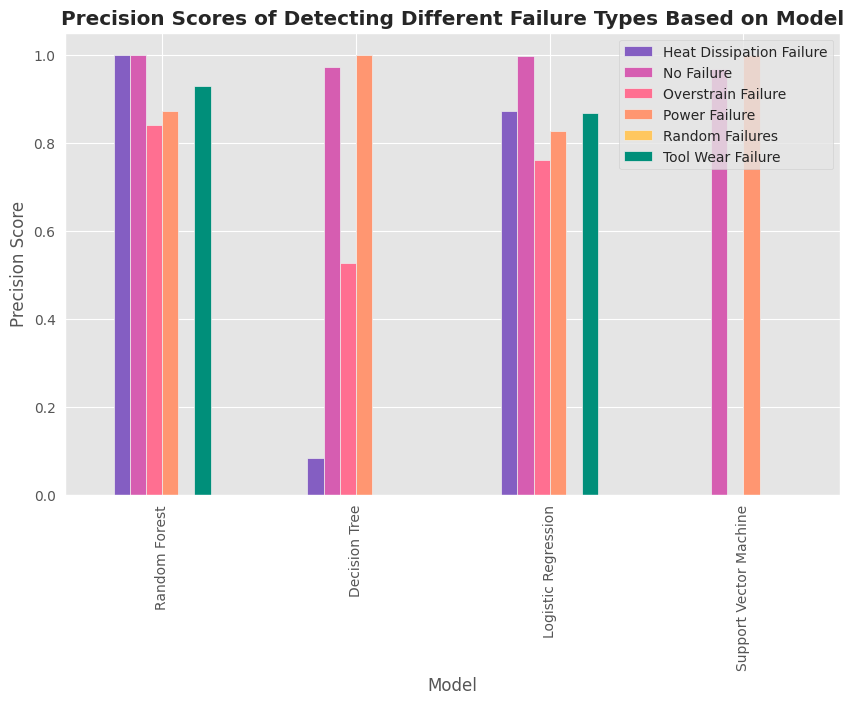

In [ ]:
failure_type_precision_score_df.plot.bar(figsize=(10,6), color=colors)
plt.title("Precision Scores of Detecting Different Failure Types Based on Model", fontweight="bold")
plt.xlabel("Model")
plt.ylabel("Precision Score")
plt.xticks([0, 1, 2, 3],
           ["Random Forest", "Decision Tree", "Logistic Regression", "Support Vector Machine"],
           rotation='vertical');

In [ ]:
failure_type_recall_score_df = failure_type_scores_df("recall")
failure_type_recall_score_df.style.background_gradient(cmap='YlOrRd').hide_index()

Model,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Random Forest,0.882353,0.999655,0.913043,0.964286,0.000000,0.928571
Logistic Regression,0.029412,0.995166,0.434783,0.178571,0.000000,0.000000
Decision Tree,0.794118,0.998273,0.826087,0.678571,0.000000,0.928571
Support Vector Machine,0.000000,1.000000,0.000000,0.142857,0.000000,0.000000


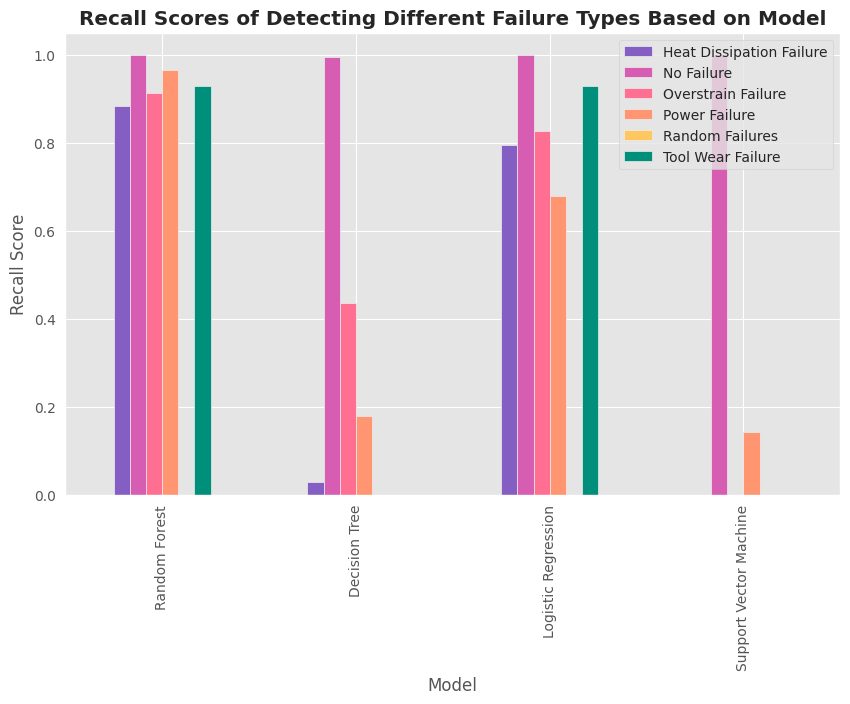

In [ ]:
failure_type_recall_score_df.plot.bar(figsize=(10,6), color=colors)
plt.title("Recall Scores of Detecting Different Failure Types Based on Model", fontweight="bold")
plt.xlabel("Model")
plt.ylabel("Recall Score")
plt.xticks([0, 1, 2, 3],
           ["Random Forest", "Decision Tree", "Logistic Regression", "Support Vector Machine"],
           rotation='vertical');

In [ ]:
failure_type_f1_score_df = failure_type_scores_df("f1-score")
failure_type_f1_score_df.style.hide_index()

Model,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Random Forest,0.937500,0.998965,0.875000,0.915254,0.000000,0.928571
Logistic Regression,0.043478,0.983786,0.476190,0.303030,0.000000,0.000000
Decision Tree,0.830769,0.997240,0.791667,0.745098,0.000000,0.896552
Support Vector Machine,0.000000,0.983028,0.000000,0.250000,0.000000,0.000000


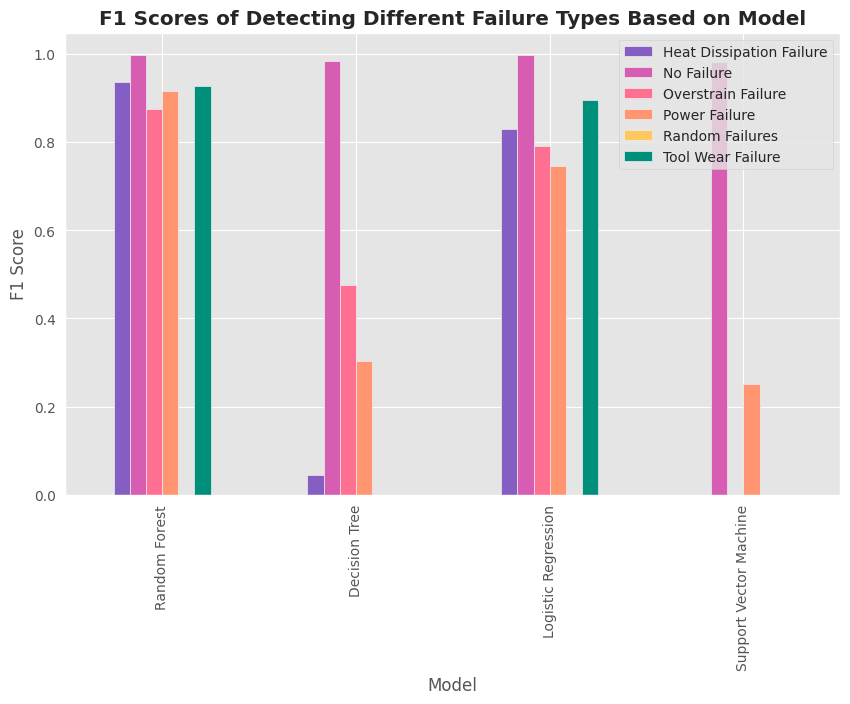

In [ ]:
failure_type_f1_score_df.plot.bar(figsize=(10,6), color=colors)
plt.title("F1 Scores of Detecting Different Failure Types Based on Model", fontweight="bold")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.xticks([0, 1, 2, 3],
           ["Random Forest", "Decision Tree", "Logistic Regression", "Support Vector Machine"],
           rotation='vertical');

In [ ]:
conclusion_df = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression", "Decision Tree", "Support Vector Machine"],
    "Precision Macro Average": [pd.DataFrame(rfc_cr)["macro avg"]["precision"],
                                pd.DataFrame(lr_cr)["macro avg"]["precision"],
                                pd.DataFrame(dtc_cr)["macro avg"]["precision"],
                                pd.DataFrame(svc_cr)["macro avg"]["precision"]],
    "Recall Macro Average": [pd.DataFrame(rfc_cr)["macro avg"]["recall"],
                                pd.DataFrame(lr_cr)["macro avg"]["recall"],
                                pd.DataFrame(dtc_cr)["macro avg"]["recall"],
                                pd.DataFrame(svc_cr)["macro avg"]["recall"]],
    "F1 Score Macro Average": [pd.DataFrame(rfc_cr)["macro avg"]["f1-score"],
                                pd.DataFrame(lr_cr)["macro avg"]["f1-score"],
                                pd.DataFrame(dtc_cr)["macro avg"]["f1-score"],
                                pd.DataFrame(svc_cr)["macro avg"]["f1-score"]],
})

In [ ]:
conclusion_df = conclusion_df.sort_values(by='F1 Score Macro Average', ascending=False)
conclusion_df.style.background_gradient(cmap='YlOrRd').hide_index()

Model,Precision Macro Average,Recall Macro Average,F1 Score Macro Average
Random Forest,0.772969,0.781318,0.775882
Decision Tree,0.719988,0.704270,0.710221
Logistic Regression,0.430385,0.272989,0.301081
Support Vector Machine,0.327770,0.190476,0.205505


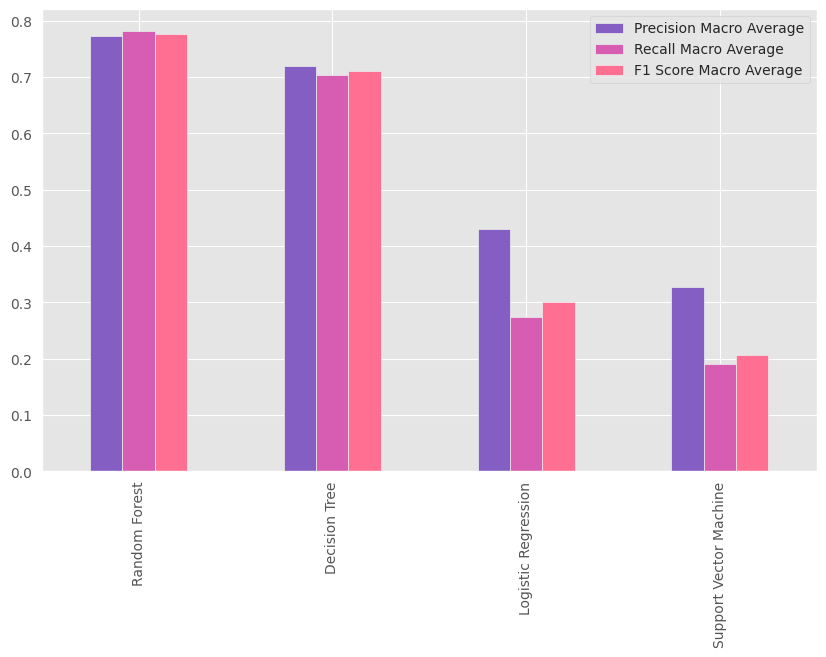

In [ ]:
conclusion_df.plot.bar(figsize=(10,6), color=colors)
plt.xticks([0, 1, 2, 3],
           ["Random Forest", "Decision Tree", "Logistic Regression", "Support Vector Machine"],
           rotation='vertical');